<a href="https://colab.research.google.com/github/Darshanbreddy/LLM/blob/main/Shortcut_connections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are comparing how a feedforward network transforms input data with and without a residual (shortcut) connection, to show that residual connections help preserve the original input in the output.

1. Import Libraries & Prepare Input

In [2]:
import torch
import torch.nn.functional as F

# Set seed for reproducibility
torch.manual_seed(0)

# Dummy input (batch_size=3, features=8)
x = torch.randn(3, 8)


2. Define GELU Activation Function

In [3]:
# Custom GELU activation
def gelu(x):
    return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2 / 3.14159265)) * (x + 0.044715 * x**3)))


3. Feedforward Block WITHOUT Shortcut Connection

In [4]:
def feedforward(x):
    w1 = torch.randn(8, 8)
    b1 = torch.randn(8)
    w2 = torch.randn(8, 8)
    b2 = torch.randn(8)
    out = gelu(x @ w1 + b1)
    return out @ w2 + b2


Feedforward Block WITH Shortcut (Residual) Connection

In [5]:
def feedforward_residual(x):
    w1 = torch.randn(8, 8)
    b1 = torch.randn(8)
    w2 = torch.randn(8, 8)
    b2 = torch.randn(8)
    out = gelu(x @ w1 + b1)
    return x + (out @ w2 + b2)


Apply Both and Print Results

In [6]:
# Apply both blocks
out_no_shortcut = feedforward(x)
out_with_shortcut = feedforward_residual(x)

print("Input:")
print(x)

print("\nOutput WITHOUT Shortcut:")
print(out_no_shortcut)

print("\nOutput WITH Shortcut:")
print(out_with_shortcut)


Input:
tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152],
        [ 0.4681, -0.1577,  1.4437,  0.2660,  0.1665,  0.8744, -0.1435, -0.1116],
        [ 0.9318,  1.2590,  2.0050,  0.0537,  0.6181, -0.4128, -0.8411, -2.3160]])

Output WITHOUT Shortcut:
tensor([[  5.6122,  11.5828,   2.2911, -12.0864,   1.9542,  -3.6320,   0.3634,
          -6.7727],
        [  1.0382,   2.9239,   6.5162,  -1.3849,  -5.9043,  -4.2319,   0.6199,
          -6.7644],
        [  3.1892,  13.9921,  -1.0149, -13.5437,   4.2908,  -3.4647,   3.7786,
          -8.6784]])

Output WITH Shortcut:
tensor([[ -4.6840,  -2.2521,   4.7760, -14.9183,   1.4728,  10.2360,  -4.7204,
          -4.9502],
        [ -7.5465,  -0.3374,  -4.3114,  -0.1723,   2.0280,   0.2930,   0.9179,
          -6.3830],
        [  1.0189,   0.1378,   1.7622,  -4.1616,  -1.9004,   1.8681,   0.0781,
           0.3867]])


 ----------------------------------------------------------
 🔍 Output Analysis: Effect of Shortcut Connections
 ----------------------------------------------------------
 Input:
 tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152],
         [ 0.4681, -0.1577,  1.4437,  0.2660,  0.1665,  0.8744, -0.1435, -0.1116],
         [ 0.9318,  1.2590,  2.0050,  0.0537,  0.6181, -0.4128, -0.8411, -2.3160]])

 Output WITHOUT Shortcut:
 tensor([[  5.6122,  11.5828,   2.2911, -12.0864,   1.9542,  -3.6320,   0.3634,  -6.7727],
         [  1.0382,   2.9239,   6.5162,  -1.3849,  -5.9043,  -4.2319,   0.6199,  -6.7644],
         [  3.1892,  13.9921,  -1.0149, -13.5437,   4.2908,  -3.4647,   3.7786,  -8.6784]])

 Output WITH Shortcut:
 tensor([[ -4.6840,  -2.2521,   4.7760, -14.9183,   1.4728,  10.2360,  -4.7204,  -4.9502],
         [ -7.5465,  -0.3374,  -4.3114,  -0.1723,   2.0280,   0.2930,   0.9179,  -6.3830],
         [  1.0189,   0.1378,   1.7622,  -4.1616,  -1.9004,   1.8681,   0.0781,   0.3867]])

 ✨ Interpretation:
 The feedforward network without shortcut changes the input drastically,
 showing large deviations. In contrast, the network with a shortcut connection
 preserves more of the original input pattern, helping retain input information.
 This demonstrates how residual connections stabilize transformations
 and assist in deeper network training.
----------------------------------------------------------


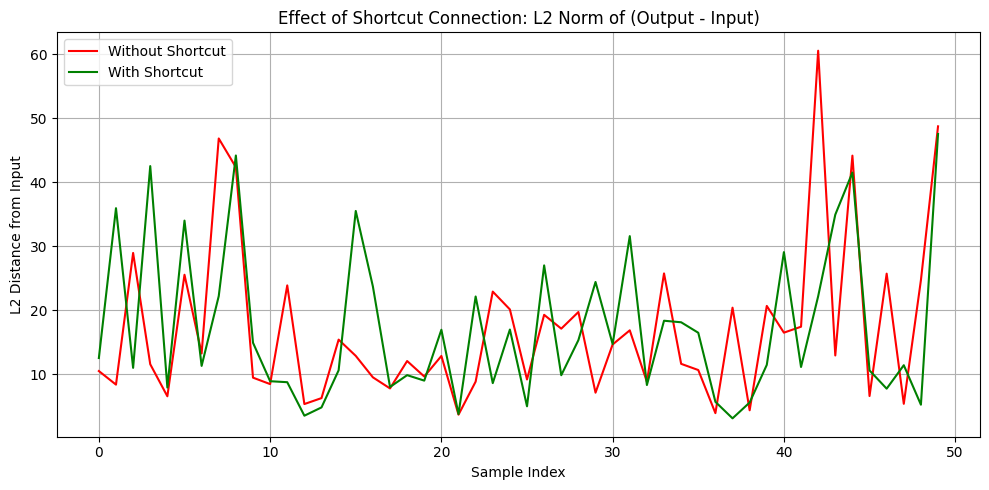

In [7]:
import torch
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(0)

# Input tensor: 50 samples, 8 features
x = torch.randn(50, 8)

# GELU activation
def gelu(x):
    return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2 / 3.14159265)) * (x + 0.044715 * x**3)))

# Feedforward without shortcut
def feedforward(x):
    w1 = torch.randn(8, 8)
    b1 = torch.randn(8)
    w2 = torch.randn(8, 8)
    b2 = torch.randn(8)
    out = gelu(x @ w1 + b1)
    return out @ w2 + b2

# Feedforward with shortcut
def feedforward_residual(x):
    w1 = torch.randn(8, 8)
    b1 = torch.randn(8)
    w2 = torch.randn(8, 8)
    b2 = torch.randn(8)
    out = gelu(x @ w1 + b1)
    return x + (out @ w2 + b2)

# Compute outputs
out_no_shortcut = feedforward(x)
out_with_shortcut = feedforward_residual(x)

# L2 differences from input
diff_no_shortcut = (out_no_shortcut - x).norm(dim=1)
diff_with_shortcut = (out_with_shortcut - x).norm(dim=1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(diff_no_shortcut.numpy(), label='Without Shortcut', color='red')
plt.plot(diff_with_shortcut.numpy(), label='With Shortcut', color='green')
plt.title('Effect of Shortcut Connection: L2 Norm of (Output - Input)')
plt.xlabel('Sample Index')
plt.ylabel('L2 Distance from Input')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Visualizing the Impact of Shortcut (Residual) Connections

Step-by-step breakdown:

Generate a random input tensor x with 50 samples, each having 8 features.

Define a custom GELU activation function, commonly used in Transformers and modern neural networks.

Create two versions of a feedforward neural network:
feedforward(x): A standard two-layer feedforward neural network WITHOUT shortcut connections.
feedforward_residual(x): Same as above, but WITH a residual (shortcut) connection that adds the input back to the output.

Compute outputs from both versions and measure the L2 norm between the output and original input.
This helps visualize how much the input is being altered by each network.

Plot the L2 distances for all 50 samples:
Red curve shows how far the output is from the input without using shortcuts.
Green curve shows the same metric when a shortcut connection is included.

